<a href="https://colab.research.google.com/github/abhitiwari007/Bank-Customer-Churn/blob/main/Bank_Customer_Churn_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Model**

# **Objective**
We aim to accomplist the following for this study:

1] Identify and visualize which factors contribute to customer churn:

2] Build a prediction model that will perform the following:

   *   Classify if a customer is going to churn or not
   *   Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn





# **Data Source**
https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv



In [ ]:
# @title Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# @title Import Data
bccm = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

In [ ]:
bccm.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
bccm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [ ]:
bccm.shape

(10000, 13)

In [ ]:
# @title Describe Data
bccm.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
bccm.dtypes

CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
Num Of Products       int64
Has Credit Card       int64
Is Active Member      int64
Estimated Salary    float64
Churn                 int64
dtype: object

In [ ]:
bccm['Balance']

0            0.00
1        83807.86
2       159660.80
3            0.00
4       125510.82
          ...    
9995         0.00
9996     57369.61
9997         0.00
9998     75075.31
9999    130142.79
Name: Balance, Length: 10000, dtype: float64

In [ ]:
print(bccm.describe())
print("\n \n Shape of the data :", bccm.shape)
print("\n \n The info of the data :", bccm.info)

         CustomerId   CreditScore           Age        Tenure        Balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       Num Of Products  Has Credit Card  Is Active Member  Estimated Salary  \
count     10000.000000      10000.00000      10000.000000      10000.000000   
mean          1.530200          0.70550          0.515100     100090.239881   
std           0.581654          0.45584   

In [ ]:
bccm.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu').format('{:.2f}')

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.00,15690940.57,71936.19,15565701.00,15628528.25,15690738.00,15753233.75,15815690.00
CreditScore,10000.00,650.53,96.65,350.00,584.00,652.00,718.00,850.00
Age,10000.00,38.92,10.49,18.00,32.00,37.00,44.00,92.00
Tenure,10000.00,5.01,2.89,0.00,3.00,5.00,7.00,10.00
Balance,10000.00,76485.89,62397.41,0.00,0.00,97198.54,127644.24,250898.09
Num Of Products,10000.00,1.53,0.58,1.00,1.00,1.00,2.00,4.00
Has Credit Card,10000.00,0.71,0.46,0.00,0.00,1.00,1.00,1.00
Is Active Member,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
Estimated Salary,10000.00,100090.24,57510.49,11.58,51002.11,100193.91,149388.25,199992.48
Churn,10000.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00


In [ ]:
bccm.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [ ]:
# @title Data Visualization
bccm.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
bccm = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
bccm.columns =('CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn')

In [ ]:
str(bccm)

'      CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \\\n0       15634602   Hargrave          619    France  Female   42       2   \n1       15647311       Hill          608     Spain  Female   41       1   \n2       15619304       Onio          502    France  Female   42       8   \n3       15701354       Boni          699    France  Female   39       1   \n4       15737888   Mitchell          850     Spain  Female   43       2   \n...          ...        ...          ...       ...     ...  ...     ...   \n9995    15606229   Obijiaku          771    France    Male   39       5   \n9996    15569892  Johnstone          516    France    Male   35      10   \n9997    15584532        Liu          709    France  Female   36       7   \n9998    15682355  Sabbatini          772   Germany    Male   42       3   \n9999    15628319     Walker          792    France  Female   28       4   \n\n        Balance  Num Of Products  Has Credit Card  Is Active Member  \\\n0          

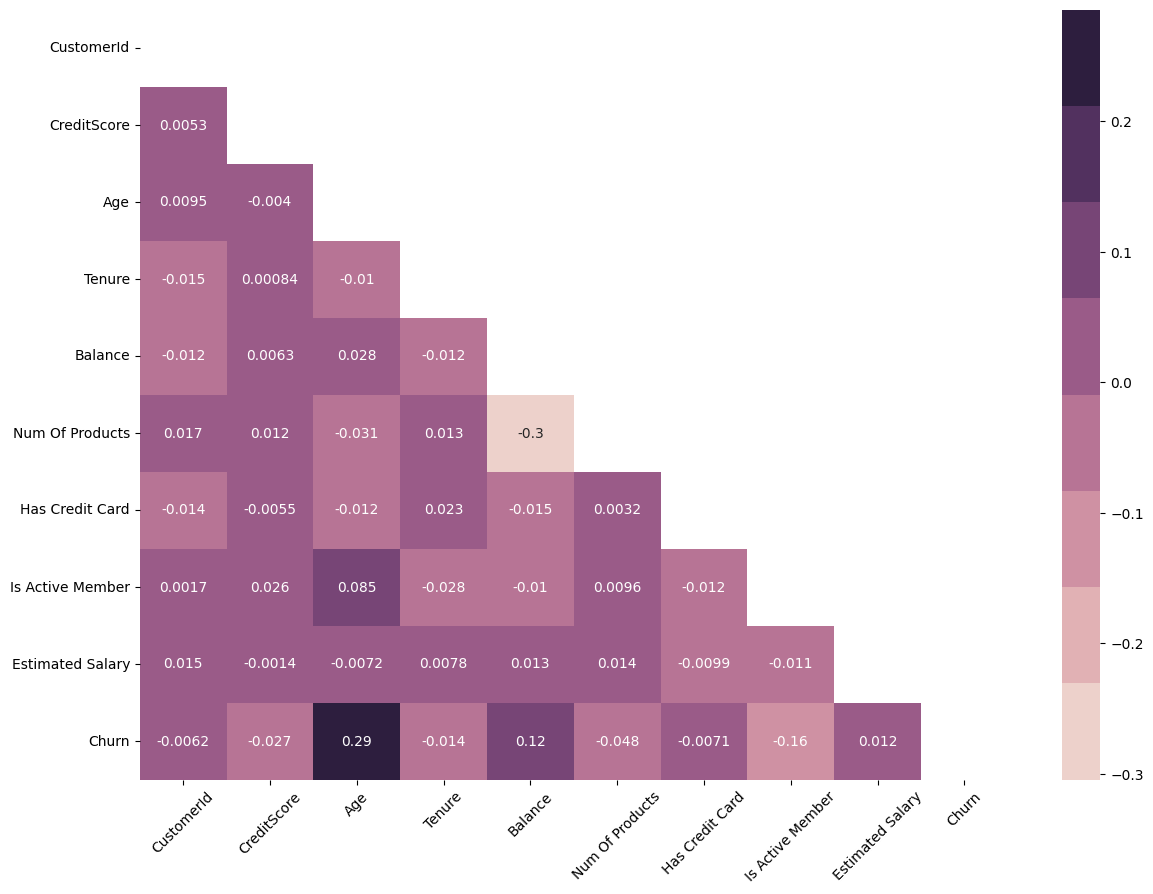

In [ ]:
object_columns = bccm.select_dtypes(include='object').columns
df_numeric = bccm.drop(columns=object_columns)
matrix = np.triu(df_numeric.corr())
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap=sns.cubehelix_palette(8), mask=matrix)
plt.xticks(rotation=45);

In [ ]:
bccm.columns


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
# @title Surname
bccm["Surname"].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [ ]:
bccm["Surname"].value_counts()

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64

In [ ]:
def first_look(column_name):
  print(bccm[column_name].value_counts())


In [ ]:
first_look("Surname")

Surname
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: count, Length: 2932, dtype: int64


In [ ]:
bccm["Surname"].describe().T

count     10000
unique     2932
top       Smith
freq         32
Name: Surname, dtype: object

In [ ]:
bccm.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn         0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


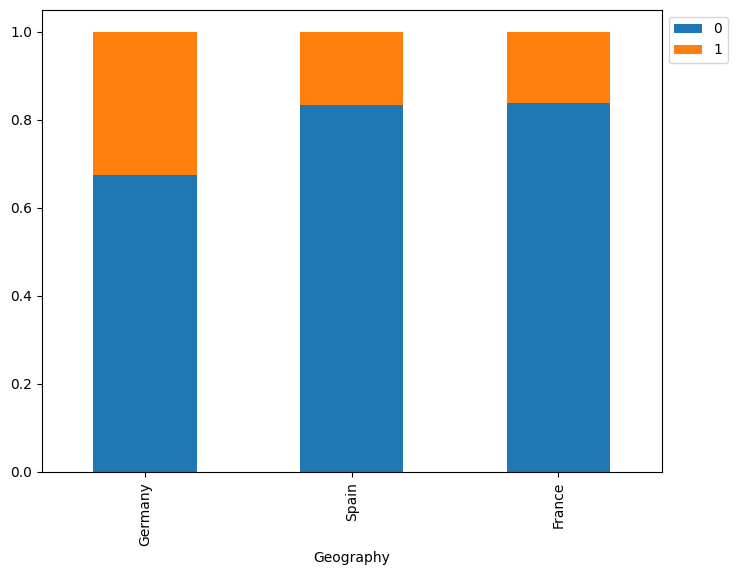

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn      0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


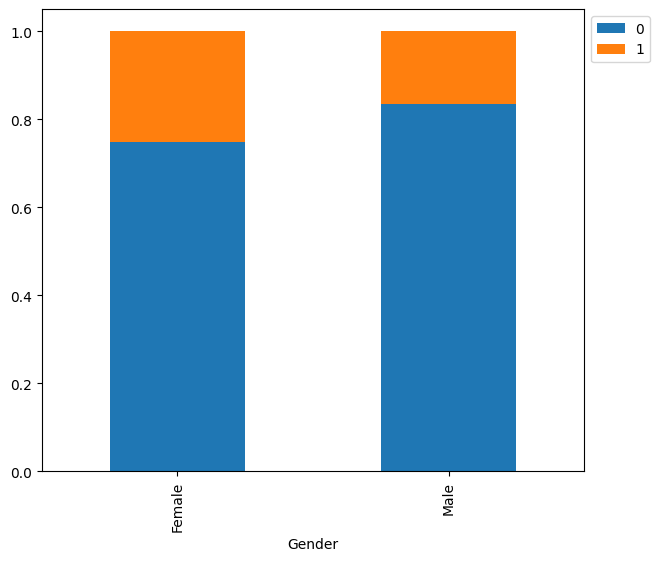

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn               0     1    All
Num Of Products                   
All              7963  2037  10000
1                3675  1409   5084
2                4242   348   4590
3                  46   220    266
4                   0    60     60
------------------------------------------------------------------------------------------------------------------------


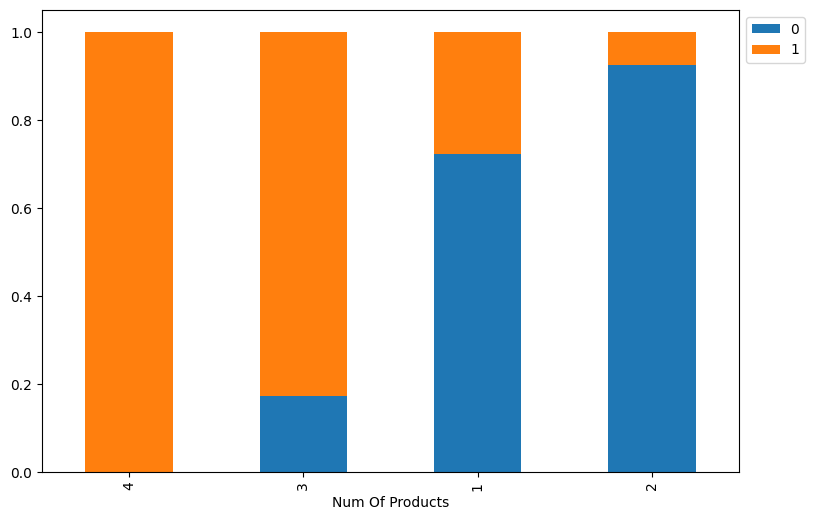

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn               0     1    All
Has Credit Card                   
All              7963  2037  10000
1                5631  1424   7055
0                2332   613   2945
------------------------------------------------------------------------------------------------------------------------


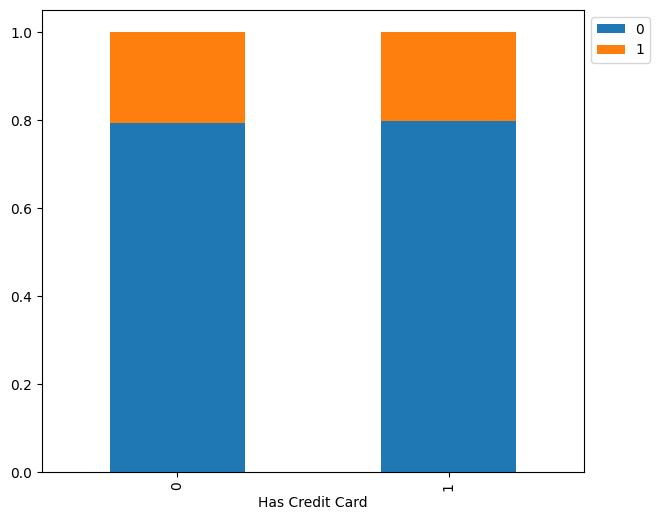

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn                0     1    All
Is Active Member                   
All               7963  2037  10000
0                 3547  1302   4849
1                 4416   735   5151
------------------------------------------------------------------------------------------------------------------------


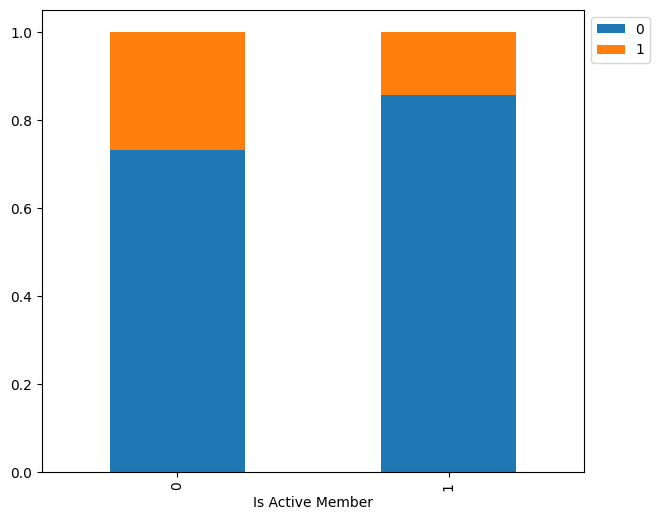

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn     0     1    All
Age                     
All    7963  2037  10000
46      135    91    226
40      343    89    432
43      209    88    297
45      142    87    229
..      ...   ...    ...
79        4     0      4
78        5     0      5
77       10     0     10
76       11     0     11
75        9     0      9

[71 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


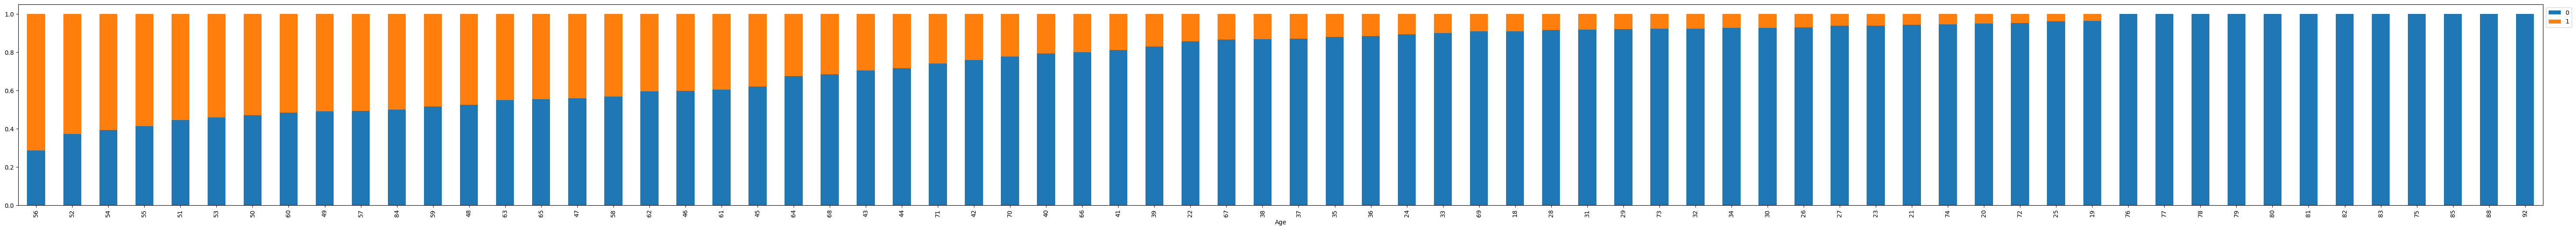

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn      0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


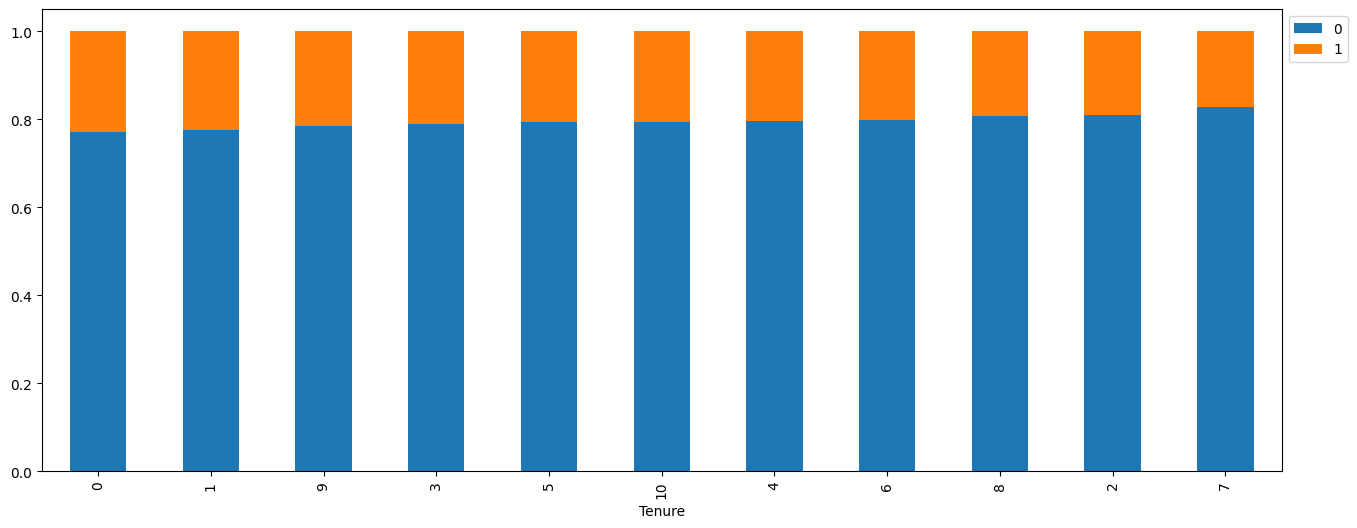

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')
Churn     0     1    All
Churn                   
1         0  2037   2037
All    7963  2037  10000
0      7963     0   7963
------------------------------------------------------------------------------------------------------------------------


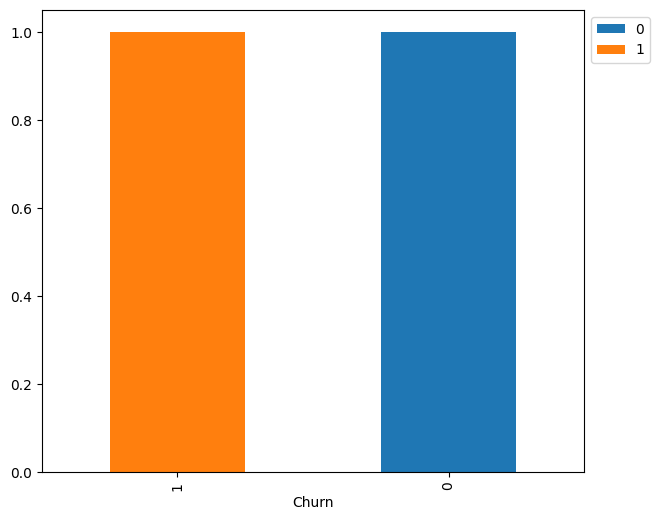

In [ ]:
categorical = ['Geography', 'Gender', 'Num Of Products', 'Has Credit Card', 'Is Active Member', 'Age','Tenure','Churn']
for i in categorical:
    print(df.columns)
    stacked_barplot(bccm,i,'Churn')

In [ ]:
# @title Data Preprocessing
df.isna().sum()

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64

In [ ]:
df.nunique()


CustomerId          10000
Surname              2932
CreditScore           460
Geography               3
Gender                  2
Age                    70
Tenure                 11
Balance              6382
Num Of Products         4
Has Credit Card         2
Is Active Member        2
Estimated Salary     9999
Churn                   2
dtype: int64

In [ ]:
bccm.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [ ]:
# @title Define Target Variable (y) and Feature Variables (X)
X = bccm.drop('CustomerId',axis=1)
y = bccm['Churn']

In [ ]:
dummy_cat = ['Geography','Gender']
X = pd.get_dummies(X,columns=dummy_cat,drop_first= True)
X.head()

,Surname,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [ ]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
#  @title Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, stratify = y, random_state = 2529)


In [ ]:
print(f''' X_train shape: {X_train.shape}
 X_test shape: {X_test.shape}
 y_train shape: {y_train.shape}
 y_test shape: {y_test.shape}''')


 X_train shape: (7000, 13)
 X_test shape: (3000, 13)
 y_train shape: (7000,)
 y_test shape: (3000,)


In [ ]:
from imblearn.over_sampling import SMOTE

non_numeric_columns = X_train.select_dtypes(exclude=['number']).columns


X_train = pd.get_dummies(X_train, columns=non_numeric_columns)
X_test = pd.get_dummies(X_test, columns=non_numeric_columns)

from imblearn.over_sampling import SMOTE

print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of X_train: {}".format(X_train_over.shape))
print("After UpSampling, the shape of y-train: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1426
Before UpSampling, counts of label 'No': 5574 

After UpSampling, counts of label 'Yes': 5574
After UpSampling, counts of label 'No': 5574 

After UpSampling, the shape of X_train: (11148, 2465)
After UpSampling, the shape of y-train: (11148,) 



In [ ]:
from imblearn.under_sampling import RandomUnderSampler

random_us = RandomUnderSampler(random_state=1, sampling_strategy = 0.5)
X_train_un, y_train_un = random_us.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))


print("After UpSampling, the shape of X_train: {}".format(X_train_un.shape))
print("After UpSampling, the shape of y-train: {} \n".format(y_train_un.shape))

After UpSampling, counts of label 'Yes': 1426
After UpSampling, counts of label 'No': 2852 

After UpSampling, the shape of X_train: (4278, 2465)
After UpSampling, the shape of y-train: (4278,) 



In [ ]:
# @title Modeling
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer




In [ ]:
def best_model(model):
    print(model.best_score_)
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method);
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2);
    return (auc_score, fpr_df, tpr_df)

In [ ]:
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, # Changed 'warn' to 'auto'
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [ ]:
import pandas as pd
df_train = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
numerical_cols = df_train.select_dtypes(include=['number']).columns
df_train_numeric = df_train[numerical_cols]

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train_numeric)

# Check if 'Exited' column exists and is correctly named
print(df_train.columns)


log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None,  # Changed 'warn' to 'auto'
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train['Churn'])


Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')


LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [ ]:

# @title Model prediction

bccm = LogisticRegression()

X_train_transformed =  df_train.select_dtypes(include=['number']).drop('Churn', axis=1) # Use .drop() to remove the 'Churn' column
y_train = df_train.Churn
bccm.fit(X_train_transformed, y_train)


from sklearn.model_selection import train_test_split
X = df_train.select_dtypes(include=['number']).drop('Churn', axis=1)
y = df_train.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


X_test_transformed = X_test.copy()

y_pred = bccm.predict(X_test_transformed)
y_pred.shape

(2000,)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
bccm.predict_proba(X_test_transformed)

array([[0.78899916, 0.21100084],
       [0.85137256, 0.14862744],
       [0.85617838, 0.14382162],
       ...,
       [0.85794472, 0.14205528],
       [0.85468201, 0.14531799],
       [0.7675027 , 0.2324973 ]])

In [ ]:
 # @title Model evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, bccm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


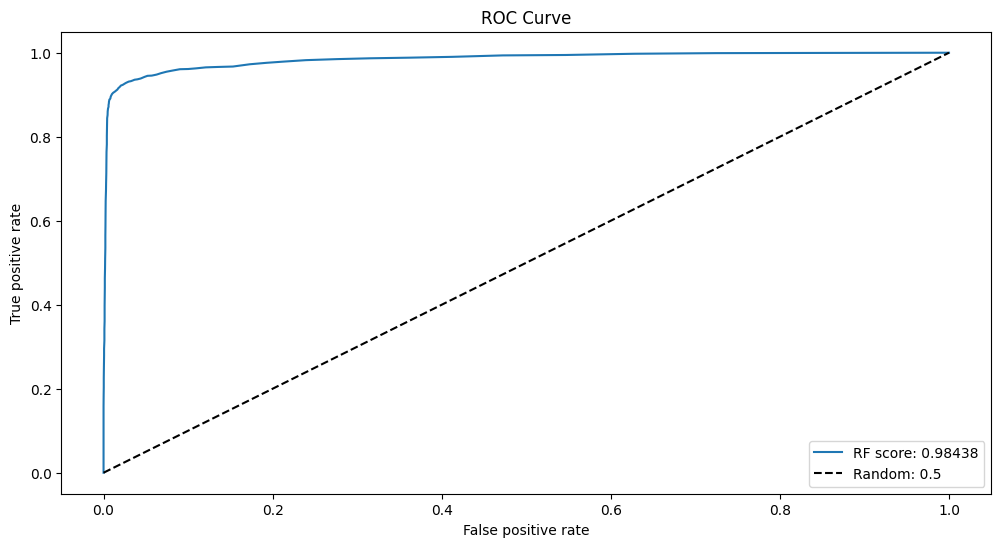

In [ ]:


from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

def get_auc_scores(y_true, y_pred, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc_score = auc(fpr, tpr)
    return auc_score, fpr, tpr


df_test = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')


from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()


X_train_numerical = X_train.select_dtypes(include=['number'])
RF.fit(X_train_numerical, y_train)

X_test_numerical = df_test.select_dtypes(include=['number']).drop('Churn', axis=1)

auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(df_test.Churn,
                                                       RF.predict(X_test_numerical),
                                                       RF.predict_proba(X_test_numerical)[:,1])

plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.savefig('roc_results_ratios.png')
plt.show()

# **Explanation**

* The Banking sector is evolving rapidly and is very well influenced by technological advancements, changing consumer preferences,and a competitive market.
* Customer churn, which is the phenomenon of customers discontinuing their relationship with a bank, poses unique challenges and opportunities. When a bank loses customers, it can seriously affect how much money it makes and its market standing.
* Machine learning, with its predictive capabilities, offers a transformative approach to understanding and mitigating the
challenges posed by customer churn.




